In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 생성
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active'],
    'max_attempts': [1, 1, 1, 'none', 'none', 'none', 
                     5, 5, 5, 15, 15, 15, 30, 30, 30],
    'num_of_shots': [100, 500, 1000, 100, 500, 1000,
                     100, 500, 1000, 100, 500, 1000,
                     100, 500, 1000],
    'elapsed_time': ['8.5/8.2', '8.85/8.53', '8.84/8.22', '16.85/16.45', '26.22/25.64', '41.89/41.51',
                     '8.28/8.88', '16.59/16.79', '19.1/16.83', '8.35/8.38', '16.73/16.69', '25.38/25.09',
                     '16.74/16.66', '25.10/25.06', '30.58/33.46']
}

df = pd.DataFrame(data)

# elapsed_time을 평균값으로 변환
df['elapsed_time_avg'] = df['elapsed_time'].apply(lambda x: sum(map(float, x.split('/'))) / 2)

# reset type별로 구분하기 위한 label 생성
df['reset_label'] = df.apply(lambda row: 
    f"{row['reset']} (max_attempts={row['max_attempts']})" 
    if row['reset'] == 'active' 
    else f"{row['reset']}", axis=1)

# 그래프용 데이터 정리
df_plot = df.groupby(['reset_label', 'num_of_shots'])['elapsed_time_avg'].mean().reset_index()

print("=== 데이터 프레임 ===")
print(df)
print("\n=== 그래프용 정리된 데이터 ===")
print(df_plot)

# 1. Plotly 버전
fig_plotly = go.Figure()

# 각 reset type별로 라인 추가
for reset_type in df_plot['reset_label'].unique():
    df_subset = df_plot[df_plot['reset_label'] == reset_type]
    
    fig_plotly.add_trace(go.Scatter(
        x=df_subset['num_of_shots'],
        y=df_subset['elapsed_time_avg'],
        mode='lines+markers',
        name=reset_type,
        marker=dict(size=8),
        line=dict(width=2)
    ))

fig_plotly.update_layout(
    title='Reset Type Performance Analysis',
    xaxis_title='Number of Shots',
    yaxis_title='Elapsed Time (seconds)',
    xaxis=dict(
        tickmode='array',
        tickvals=[100, 500, 1000],
        ticktext=['100', '500', '1000']
    ),
    legend=dict(
        title='Reset Type',
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    hovermode='x unified',
    template='plotly_white'
)

fig_plotly.show()

=== 데이터 프레임 ===
      reset max_attempts  num_of_shots elapsed_time  elapsed_time_avg  \
0    active            1           100      8.5/8.2             8.350   
1    active            1           500    8.85/8.53             8.690   
2    active            1          1000    8.84/8.22             8.530   
3   thermal         none           100  16.85/16.45            16.650   
4   thermal         none           500  26.22/25.64            25.930   
5   thermal         none          1000  41.89/41.51            41.700   
6    active            5           100    8.28/8.88             8.580   
7    active            5           500  16.59/16.79            16.690   
8    active            5          1000   19.1/16.83            17.965   
9    active           15           100    8.35/8.38             8.365   
10   active           15           500  16.73/16.69            16.710   
11   active           15          1000  25.38/25.09            25.235   
12   active           30           

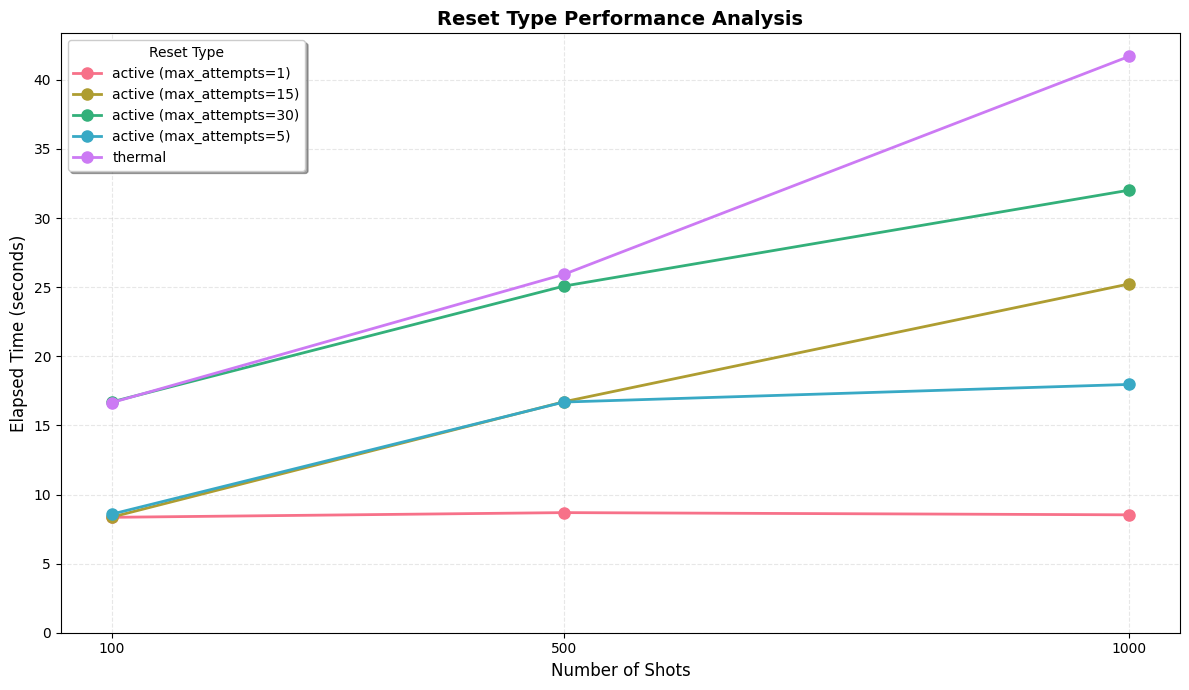


=== 성능 요약 통계 ===
                           mean        std     min     max
reset   max_attempts                                      
active  1              8.523333   0.170098   8.350   8.690
        5             14.411667   5.090448   8.580  17.965
        15            16.770000   8.435160   8.365  25.235
        30            24.600000   7.671271  16.700  32.020
thermal none          28.093333  12.664345  16.650  41.700


In [3]:
# 2. Seaborn/Matplotlib 버전
plt.figure(figsize=(12, 7))

# 색상 팔레트 설정
palette = sns.color_palette("husl", n_colors=len(df_plot['reset_label'].unique()))

# 각 reset type별로 라인 플롯
for i, reset_type in enumerate(df_plot['reset_label'].unique()):
    df_subset = df_plot[df_plot['reset_label'] == reset_type]
    plt.plot(df_subset['num_of_shots'], 
             df_subset['elapsed_time_avg'], 
             marker='o', 
             markersize=8,
             linewidth=2,
             label=reset_type,
             color=palette[i])

plt.xlabel('Number of Shots', fontsize=12)
plt.ylabel('Elapsed Time (seconds)', fontsize=12)
plt.title('Reset Type Performance Analysis', fontsize=14, fontweight='bold')
plt.legend(title='Reset Type', loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks([100, 500, 1000])

# y축 범위 조정 (선택사항)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

# 3. 추가 분석: 각 max_attempts별 성능 비교 (active reset만)
df_active = df[df['reset'] == 'active'].copy()
df_active['max_attempts'] = df_active['max_attempts'].astype(str)

# Plotly 인터랙티브 차트
fig_interactive = px.line(df_active, 
                          x='num_of_shots', 
                          y='elapsed_time_avg',
                          color='max_attempts',
                          markers=True,
                          title='Active Reset Performance by Max Attempts',
                          labels={'elapsed_time_avg': 'Elapsed Time (seconds)',
                                 'num_of_shots': 'Number of Shots',
                                 'max_attempts': 'Max Attempts'},
                          color_discrete_sequence=px.colors.qualitative.Set2)

fig_interactive.update_traces(marker=dict(size=10), line=dict(width=2.5))
fig_interactive.update_layout(hovermode='x unified')
fig_interactive.show()

# 4. 성능 요약 통계
print("\n=== 성능 요약 통계 ===")
summary = df.groupby(['reset', 'max_attempts'])['elapsed_time_avg'].agg(['mean', 'std', 'min', 'max'])
print(summary)

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# 데이터 생성
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal', 
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'thermal', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'thermal', 'thermal'],
    'max_attempts': ['1', '1', '1', 'none', 'none', 'none', 
                     '5', '5', '5', '15', '15', '15',
                     '30', '30', '30', '1', '15', '30',
                     'none', '30', '15', '5', '1', '1',
                     '1', '1', '1', '1', '1', '5',
                     '5', '5', '5', '15', '15', '15',
                     '15', 'none', 'none'],
    'amp_steps': [53, 53, 53, 53, 53, 53, 
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 5300,
                  530, 5300, 5300, 530, 530, 530,
                  530, 530, 530, 5300, 5300, 5300,
                  5300, 530, 5300],
    'shots': [100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 1, 1, 1,
              3000, 3000, 3000, 3000, 3000, 3000,
              30, 500, 1000, 1000, 500, 100,
              500, 1000, 3000, 100, 500, 1000,
              3000, 100, 100],
    'elapse_time': [8.35, 8.69, 8.53, 16.65, 25.93, 41.7,
                    8.58, 16.69, 17.965, 8.365, 16.71, 25.295,
                    8.37, 25.08, 33.44, 8.325, 8.365, 8.355,
                    94.63, 76.25, 41.67, 24.99, 16.72, 328.38,
                    8.35, 67.06, 114.82, 24.95, 16.66, 16.64,
                    33.38, 49.92, 116.69, 47.9, 192.06, 386.65,
                    1153.2, 41.71, 320.12]
}

df = pd.DataFrame(data)

# 레전드를 위한 조합 생성
df['legend'] = df['reset'] + '_' + df['max_attempts'].astype(str) + '_' + df['amp_steps'].astype(str)

# 고유한 레전드 값들
unique_legends = df['legend'].unique()

# 색상 팔레트 생성
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Set2

# Plotly 그래프 생성
fig = go.Figure()

# 각 레전드 그룹별로 산점도 추가
for i, legend in enumerate(unique_legends):
    subset = df[df['legend'] == legend]
    fig.add_trace(go.Scatter(
        x=subset['shots'],
        y=subset['elapse_time'],
        mode='markers',
        name=legend,
        marker=dict(
            size=8,
            color=colors[i % len(colors)]
        )
    ))

# 전체 데이터에 대한 선형 회귀
X = df['shots'].values.reshape(-1, 1)
y = df['elapse_time'].values

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선을 위한 x 값 생성
x_range = np.linspace(df['shots'].min(), df['shots'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# 회귀선 추가
fig.add_trace(go.Scatter(
    x=x_range,
    y=y_pred,
    mode='lines',
    name=f'Linear Regression (y={model.coef_[0]:.4f}x+{model.intercept_:.2f})',
    line=dict(color='red', width=2, dash='dash')
))

# 레이아웃 설정
fig.update_layout(
    title='Shots vs Elapse Time with Linear Regression',
    xaxis_title='# of shots (x-axis)',
    yaxis_title='avg elapse_time (s) (y-axis)',
    hovermode='closest',
    width=1000,
    height=600,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# 그래프 표시
fig.show()

# 선형 회귀 결과 출력
print("\n=== 선형 회귀 분석 결과 ===")
print(f"방정식: y = {model.coef_[0]:.6f}x + {model.intercept_:.4f}")
print(f"기울기 (a): {model.coef_[0]:.6f}")
print(f"절편 (b): {model.intercept_:.4f}")

# R² 점수 계산
from sklearn.metrics import r2_score
y_pred_all = model.predict(X)
r2 = r2_score(y, y_pred_all)
print(f"R² 점수: {r2:.4f}")

# 추가 분석: 각 파라미터 조합별 회귀 분석
print("\n=== 주요 그룹별 선형 회귀 분석 ===")
main_groups = df.groupby('reset')

for name, group in main_groups:
    if len(group) > 2:  # 최소 3개 이상의 데이터 포인트가 있을 때만 회귀 분석
        X_group = group['shots'].values.reshape(-1, 1)
        y_group = group['elapse_time'].values
        
        model_group = LinearRegression()
        model_group.fit(X_group, y_group)
        
        print(f"\n{name} 그룹:")
        print(f"  방정식: y = {model_group.coef_[0]:.6f}x + {model_group.intercept_:.4f}")
        print(f"  데이터 포인트 수: {len(group)}")

# amp_steps별 분석
print("\n=== amp_steps별 선형 회귀 분석 ===")
amp_groups = df.groupby('amp_steps')

for amp_step, group in amp_groups:
    if len(group) > 2:
        X_group = group['shots'].values.reshape(-1, 1)
        y_group = group['elapse_time'].values
        
        model_group = LinearRegression()
        model_group.fit(X_group, y_group)
        
        print(f"\namp_steps = {amp_step}:")
        print(f"  방정식: y = {model_group.coef_[0]:.6f}x + {model_group.intercept_:.4f}")
        print(f"  데이터 포인트 수: {len(group)}")


=== 선형 회귀 분석 결과 ===
방정식: y = 0.068011x + 21.9048
기울기 (a): 0.068011
절편 (b): 21.9048
R² 점수: 0.1419

=== 주요 그룹별 선형 회귀 분석 ===

active 그룹:
  방정식: y = 0.081221x + 5.9300
  데이터 포인트 수: 33

thermal 그룹:
  방정식: y = -0.008725x + 97.1033
  데이터 포인트 수: 6

=== amp_steps별 선형 회귀 분석 ===

amp_steps = 53:
  방정식: y = 0.013840x + 10.0558
  데이터 포인트 수: 23

amp_steps = 530:
  방정식: y = 0.032381x + 13.3210
  데이터 포인트 수: 8

amp_steps = 5300:
  방정식: y = 0.212360x + 82.0603
  데이터 포인트 수: 8


In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# 데이터 생성
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal', 
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'thermal', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'thermal', 'thermal'],
    'max_attempts': ['1', '1', '1', 'none', 'none', 'none', 
                     '5', '5', '5', '15', '15', '15',
                     '30', '30', '30', '1', '15', '30',
                     'none', '30', '15', '5', '1', '1',
                     '1', '1', '1', '1', '1', '5',
                     '5', '5', '5', '15', '15', '15',
                     '15', 'none', 'none'],
    'amp_steps': [53, 53, 53, 53, 53, 53, 
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 5300,
                  530, 5300, 5300, 530, 530, 530,
                  530, 530, 530, 5300, 5300, 5300,
                  5300, 530, 5300],
    'shots': [100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 1, 1, 1,
              3000, 3000, 3000, 3000, 3000, 3000,
              30, 500, 1000, 1000, 500, 100,
              500, 1000, 3000, 100, 500, 1000,
              3000, 100, 100],
    'elapse_time': [8.35, 8.69, 8.53, 16.65, 25.93, 41.7,
                    8.58, 16.69, 17.965, 8.365, 16.71, 25.295,
                    8.37, 25.08, 33.44, 8.325, 8.365, 8.355,
                    94.63, 76.25, 41.67, 24.99, 16.72, 328.38,
                    8.35, 67.06, 114.82, 24.95, 16.66, 16.64,
                    33.38, 49.92, 116.69, 47.9, 192.06, 386.65,
                    1153.2, 41.71, 320.12]
}

df = pd.DataFrame(data)

# 레전드를 위한 조합 생성
df['legend'] = df['reset'] + '_' + df['max_attempts'].astype(str) + '_' + df['amp_steps'].astype(str)

# 고유한 레전드 값들
unique_legends = df['legend'].unique()

# 색상 팔레트 생성
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Set2

# Plotly 그래프 생성
fig = go.Figure()

# 회귀 분석 결과 저장용 리스트
regression_results = []

# 각 레전드 그룹별로 산점도와 회귀선 추가
for i, legend in enumerate(unique_legends):
    subset = df[df['legend'] == legend]
    color = colors[i % len(colors)]
    
    # 산점도 추가
    fig.add_trace(go.Scatter(
        x=subset['shots'],
        y=subset['elapse_time'],
        mode='markers',
        name=legend,
        marker=dict(
            size=8,
            color=color
        ),
        legendgroup=legend,  # 같은 레전드 그룹으로 묶기
        showlegend=True
    ))
    
    # 데이터 포인트가 2개 이상일 때만 회귀선 추가
    if len(subset) >= 2:
        X = subset['shots'].values.reshape(-1, 1)
        y = subset['elapse_time'].values
        
        # 선형 회귀 모델 학습
        model = LinearRegression()
        model.fit(X, y)
        
        # 회귀선을 위한 x 값 생성
        x_min, x_max = subset['shots'].min(), subset['shots'].max()
        
        # x_min과 x_max가 같은 경우 처리
        if x_min == x_max:
            x_range = np.array([x_min - 10, x_min, x_min + 10])
        else:
            x_range = np.linspace(x_min, x_max, 50)
        
        y_pred = model.predict(x_range.reshape(-1, 1))
        
        # 회귀선 추가
        fig.add_trace(go.Scatter(
            x=x_range,
            y=y_pred,
            mode='lines',
            name=f'{legend}_regression',
            line=dict(color=color, width=2, dash='dash'),
            legendgroup=legend,  # 같은 레전드 그룹으로 묶기
            showlegend=False  # 회귀선은 레전드에서 숨기기
        ))
        
        # 회귀 분석 결과 저장
        regression_results.append({
            'legend': legend,
            'a (slope)': model.coef_[0],
            'b (intercept)': model.intercept_,
            'n_points': len(subset),
            'equation': f'y = {model.coef_[0]:.4f}x + {model.intercept_:.2f}'
        })

# 레이아웃 설정
fig.update_layout(
    title='Shots vs Elapse Time with Individual Linear Regressions',
    xaxis_title='# of shots (x-axis)',
    yaxis_title='avg elapse_time (s) (y-axis)',
    hovermode='closest',
    width=1200,
    height=700,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# 그래프 표시
fig.show()

# 회귀 분석 결과 출력
print("\n" + "="*70)
print("각 레전드별 선형 회귀 분석 결과 (y = ax + b)")
print("="*70)

# 결과를 DataFrame으로 변환하여 보기 좋게 출력
results_df = pd.DataFrame(regression_results)
results_df = results_df.sort_values('legend')

for idx, row in results_df.iterrows():
    print(f"\n레전드: {row['legend']}")
    print(f"  방정식: {row['equation']}")
    print(f"  기울기 (a): {row['a (slope)']:.6f}")
    print(f"  절편 (b): {row['b (intercept)']:.4f}")
    print(f"  데이터 포인트 수: {row['n_points']}")

# 요약 테이블 출력
print("\n" + "="*70)
print("회귀 분석 요약 테이블")
print("="*70)

# 보기 좋게 정렬된 테이블 출력
summary_df = results_df[['legend', 'a (slope)', 'b (intercept)', 'n_points']].copy()
summary_df['a (slope)'] = summary_df['a (slope)'].round(6)
summary_df['b (intercept)'] = summary_df['b (intercept)'].round(4)

# pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(summary_df.to_string(index=False))

# CSV로 저장 (옵션)
save_to_csv = input("\n\n결과를 CSV 파일로 저장하시겠습니까? (y/n): ")
if save_to_csv.lower() == 'y':
    results_df.to_csv('regression_results.csv', index=False)
    print("regression_results.csv 파일로 저장되었습니다.")


각 레전드별 선형 회귀 분석 결과 (y = ax + b)

레전드: active_15_53
  방정식: y = 0.0111x + 9.83
  기울기 (a): 0.011137
  절편 (b): 9.8329
  데이터 포인트 수: 5

레전드: active_15_5300
  방정식: y = 0.3824x + 5.25
  기울기 (a): 0.382352
  절편 (b): 5.2479
  데이터 포인트 수: 4

레전드: active_1_53
  방정식: y = 0.0029x + 7.48
  기울기 (a): 0.002871
  절편 (b): 7.4809
  데이터 포인트 수: 5

레전드: active_1_530
  방정식: y = 0.0171x + 7.93
  기울기 (a): 0.017108
  절편 (b): 7.9284
  데이터 포인트 수: 3

레전드: active_1_5300
  방정식: y = 0.1052x + 12.33
  기울기 (a): 0.105171
  절편 (b): 12.3295
  데이터 포인트 수: 3

레전드: active_30_53
  방정식: y = 0.0226x + 9.51
  기울기 (a): 0.022596
  절편 (b): 9.5058
  데이터 포인트 수: 5

레전드: active_5_53
  방정식: y = 0.0048x + 11.58
  기울기 (a): 0.004764
  절편 (b): 11.5771
  데이터 포인트 수: 4

레전드: active_5_530
  방정식: y = 0.0340x + 15.00
  기울기 (a): 0.034048
  절편 (b): 15.0021
  데이터 포인트 수: 4

레전드: thermal_none_53
  방정식: y = 0.0271x + 13.61
  기울기 (a): 0.027057
  절편 (b): 13.6119
  데이터 포인트 수: 4

회귀 분석 요약 테이블
         legend  a (slope)  b (intercept)  n_points
   active_15_53 

## # of attempts: X-axis

In [7]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Data creation
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal', 
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'thermal', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'thermal', 'thermal'],
    'max_attempts': ['1', '1', '1', 'none', 'none', 'none', 
                     '5', '5', '5', '15', '15', '15',
                     '30', '30', '30', '1', '15', '30',
                     'none', '30', '15', '5', '1', '1',
                     '1', '1', '1', '1', '1', '5',
                     '5', '5', '5', '15', '15', '15',
                     '15', 'none', 'none'],
    'amp_steps': [53, 53, 53, 53, 53, 53, 
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 5300,
                  530, 5300, 5300, 530, 530, 530,
                  530, 530, 530, 5300, 5300, 5300,
                  5300, 530, 5300],
    'shots': [100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 1, 1, 1,
              3000, 3000, 3000, 3000, 3000, 3000,
              30, 500, 1000, 1000, 500, 100,
              500, 1000, 3000, 100, 500, 1000,
              3000, 100, 100],
    'elapse_time': [8.35, 8.69, 8.53, 16.65, 25.93, 41.7,
                    8.58, 16.69, 17.965, 8.365, 16.71, 25.295,
                    8.37, 25.08, 33.44, 8.325, 8.365, 8.355,
                    94.63, 76.25, 41.67, 24.99, 16.72, 328.38,
                    8.35, 67.06, 114.82, 24.95, 16.66, 16.64,
                    33.38, 49.92, 116.69, 47.9, 192.06, 386.65,
                    1153.2, 41.71, 320.12]
}

df = pd.DataFrame(data)

# Convert max_attempts to numeric (none -> 0)
df['max_attempts_numeric'] = df['max_attempts'].replace('none', '0').astype(int)

# Create legend combinations (using reset, amp_steps, and shots)
df['legend'] = df['reset'] + '_steps' + df['amp_steps'].astype(str) + '_shots' + df['shots'].astype(str)

# Get unique legend values
unique_legends = df['legend'].unique()

# Create color palette
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Set2

# Create Plotly figure
fig = go.Figure()

# List to store regression analysis results
regression_results = []

# Add scatter plot and regression line for each legend group
for i, legend in enumerate(unique_legends):
    subset = df[df['legend'] == legend]
    color = colors[i % len(colors)]
    
    # Add scatter plot
    fig.add_trace(go.Scatter(
        x=subset['max_attempts_numeric'],
        y=subset['elapse_time'],
        mode='markers',
        name=legend,
        marker=dict(
            size=8,
            color=color
        ),
        legendgroup=legend,  # Group with same legend
        showlegend=True,
        text=subset['max_attempts'],  # Show original values in hover
        hovertemplate='<b>%{text}</b><br>Max Attempts: %{x}<br>Elapse Time: %{y:.2f}s<extra></extra>'
    ))
    
    # Add regression line only when there are 2 or more data points
    if len(subset) >= 2:
        X = subset['max_attempts_numeric'].values.reshape(-1, 1)
        y = subset['elapse_time'].values
        
        # Train linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Generate x values for regression line
        x_min, x_max = subset['max_attempts_numeric'].min(), subset['max_attempts_numeric'].max()
        
        # Handle case when x_min equals x_max
        if x_min == x_max:
            x_range = np.array([max(0, x_min - 5), x_min, min(30, x_min + 5)])
        else:
            x_range = np.linspace(x_min, x_max, 50)
        
        y_pred = model.predict(x_range.reshape(-1, 1))
        
        # Add regression line
        fig.add_trace(go.Scatter(
            x=x_range,
            y=y_pred,
            mode='lines',
            name=f'{legend}_regression',
            line=dict(color=color, width=2, dash='dash'),
            legendgroup=legend,  # Group with same legend
            showlegend=False  # Hide regression line from legend
        ))
        
        # Save regression analysis results
        regression_results.append({
            'legend': legend,
            'a (slope)': model.coef_[0],
            'b (intercept)': model.intercept_,
            'n_points': len(subset),
            'equation': f'y = {model.coef_[0]:.4f}x + {model.intercept_:.2f}'
        })

# Update layout
fig.update_layout(
    title='Max Attempts vs Elapse Time with Individual Linear Regressions',
    xaxis_title='Max Attempts (x-axis) [none=0]',
    yaxis_title='avg elapse_time (s) (y-axis)',
    hovermode='closest',
    width=1200,
    height=700,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=10)
    ),
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[-1, 31]
    )
)

# Display graph
fig.show()

# Print regression analysis results
print("\n" + "="*70)
print("Linear Regression Analysis Results for Each Legend (y = ax + b)")
print("="*70)

# Convert results to DataFrame for better display
results_df = pd.DataFrame(regression_results)
results_df = results_df.sort_values('legend')

for idx, row in results_df.iterrows():
    print(f"\nLegend: {row['legend']}")
    print(f"  Equation: {row['equation']}")
    print(f"  Slope (a): {row['a (slope)']:.6f}")
    print(f"  Intercept (b): {row['b (intercept)']:.4f}")
    print(f"  Number of data points: {row['n_points']}")

# Print summary table
print("\n" + "="*70)
print("Regression Analysis Summary Table")
print("="*70)

# Print formatted table
summary_df = results_df[['legend', 'a (slope)', 'b (intercept)', 'n_points']].copy()
summary_df['a (slope)'] = summary_df['a (slope)'].round(6)
summary_df['b (intercept)'] = summary_df['b (intercept)'].round(4)

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(summary_df.to_string(index=False))

# Additional analysis: Group by specific parameters
print("\n" + "="*70)
print("Analysis by Parameter Groups (where regression is possible)")
print("="*70)

# Group by shots and amp_steps to see max_attempts effect
grouped = df.groupby(['shots', 'amp_steps'])
for (shots, amp_steps), group in grouped:
    if group['max_attempts_numeric'].nunique() >= 2:  # Need at least 2 different x values
        X = group['max_attempts_numeric'].values.reshape(-1, 1)
        y = group['elapse_time'].values
        model = LinearRegression()
        model.fit(X, y)
        print(f"\nShots={shots}, Amp_steps={amp_steps}:")
        print(f"  Equation: y = {model.coef_[0]:.4f}x + {model.intercept_:.2f}")
        print(f"  Data points: {len(group)}")

# CSV save option
save_to_csv = input("\n\nWould you like to save the results to a CSV file? (y/n): ")
if save_to_csv.lower() == 'y':
    results_df.to_csv('regression_results_attempts.csv', index=False)
    print("Results have been saved to regression_results_attempts.csv")


Linear Regression Analysis Results for Each Legend (y = ax + b)

Legend: active_steps5300_shots1000
  Equation: y = 19.4164x + 95.40
  Slope (a): 19.416429
  Intercept (b): 95.4036
  Number of data points: 2

Legend: active_steps5300_shots3000
  Equation: y = 58.9157x + 269.46
  Slope (a): 58.915714
  Intercept (b): 269.4643
  Number of data points: 2

Legend: active_steps5300_shots500
  Equation: y = 8.9286x + 58.13
  Slope (a): 8.928571
  Intercept (b): 58.1314
  Number of data points: 2

Legend: active_steps530_shots1000
  Equation: y = 6.2425x + 18.71
  Slope (a): 6.242500
  Intercept (b): 18.7075
  Number of data points: 2

Legend: active_steps530_shots500
  Equation: y = 4.1800x + 12.48
  Slope (a): 4.180000
  Intercept (b): 12.4800
  Number of data points: 2

Legend: active_steps53_shots1
  Equation: y = 0.0010x + 8.33
  Slope (a): 0.001014
  Intercept (b): 8.3328
  Number of data points: 3

Legend: active_steps53_shots100
  Equation: y = -0.0028x + 8.45
  Slope (a): -0.002803


## X-axis: # of shots

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Data creation
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal', 
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'thermal', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'thermal', 'thermal'],
    'max_attempts': ['1', '1', '1', 'none', 'none', 'none', 
                     '5', '5', '5', '15', '15', '15',
                     '30', '30', '30', '1', '15', '30',
                     'none', '30', '15', '5', '1', '1',
                     '1', '1', '1', '1', '1', '5',
                     '5', '5', '5', '15', '15', '15',
                     '15', 'none', 'none'],
    'amp_steps': [53, 53, 53, 53, 53, 53, 
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 5300,
                  530, 5300, 5300, 530, 530, 530,
                  530, 530, 530, 5300, 5300, 5300,
                  5300, 530, 5300],
    'shots': [100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 1, 1, 1,
              3000, 3000, 3000, 3000, 3000, 3000,
              30, 500, 1000, 1000, 500, 100,
              500, 1000, 3000, 100, 500, 1000,
              3000, 100, 100],
    'elapse_time': [8.35, 8.69, 8.53, 16.65, 25.93, 41.7,
                    8.58, 16.69, 17.965, 8.365, 16.71, 25.295,
                    8.37, 25.08, 33.44, 8.325, 8.365, 8.355,
                    94.63, 76.25, 41.67, 24.99, 16.72, 328.38,
                    8.35, 67.06, 114.82, 24.95, 16.66, 16.64,
                    33.38, 49.92, 116.69, 47.9, 192.06, 386.65,
                    1153.2, 41.71, 320.12]
}

df = pd.DataFrame(data)

# Create legend combinations
df['legend'] = df['reset'] + '_' + df['max_attempts'].astype(str) + '_' + df['amp_steps'].astype(str)

# Get unique legend values
unique_legends = df['legend'].unique()

# Create color palette
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Set2

# Create Plotly figure
fig = go.Figure()

# List to store regression analysis results
regression_results = []

# Add scatter plot and regression line for each legend group
for i, legend in enumerate(unique_legends):
    subset = df[df['legend'] == legend]
    color = colors[i % len(colors)]
    
    # Add scatter plot
    fig.add_trace(go.Scatter(
        x=subset['shots'],
        y=subset['elapse_time'],
        mode='markers',
        name=legend,
        marker=dict(
            size=8,
            color=color
        ),
        legendgroup=legend,  # Group with same legend
        showlegend=True
    ))
    
    # Add regression line only when there are 2 or more data points
    if len(subset) >= 2:
        X = subset['shots'].values.reshape(-1, 1)
        y = subset['elapse_time'].values
        
        # Train linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Generate x values for regression line
        x_min, x_max = subset['shots'].min(), subset['shots'].max()
        
        # Handle case when x_min equals x_max
        if x_min == x_max:
            x_range = np.array([x_min - 10, x_min, x_min + 10])
        else:
            x_range = np.linspace(x_min, x_max, 50)
        
        y_pred = model.predict(x_range.reshape(-1, 1))
        
        # Add regression line
        fig.add_trace(go.Scatter(
            x=x_range,
            y=y_pred,
            mode='lines',
            name=f'{legend}_regression',
            line=dict(color=color, width=2, dash='dash'),
            legendgroup=legend,  # Group with same legend
            showlegend=False  # Hide regression line from legend
        ))
        
        # Save regression analysis results
        regression_results.append({
            'legend': legend,
            'a (slope)': model.coef_[0],
            'b (intercept)': model.intercept_,
            'n_points': len(subset),
            'equation': f'y = {model.coef_[0]:.4f}x + {model.intercept_:.2f}'
        })

# Update layout
fig.update_layout(
    title='Shots vs Elapse Time with Individual Linear Regressions',
    xaxis_title='# of shots',
    yaxis_title='avg elapse_time (s)',
    hovermode='closest',
    width=1200,
    height=700,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# Display graph
fig.show()

# Print regression analysis results
print("\n" + "="*70)
print("Linear Regression Analysis Results for Each Legend (y = ax + b)")
print("="*70)

# Convert results to DataFrame for better display
results_df = pd.DataFrame(regression_results)
results_df = results_df.sort_values('legend')

for idx, row in results_df.iterrows():
    print(f"\nLegend: {row['legend']}")
    print(f"  Equation: {row['equation']}")
    print(f"  Slope (a): {row['a (slope)']:.6f}")
    print(f"  Intercept (b): {row['b (intercept)']:.4f}")
    print(f"  Number of data points: {row['n_points']}")

# Print summary table
print("\n" + "="*70)
print("Regression Analysis Summary Table")
print("="*70)

# Print formatted table
summary_df = results_df[['legend', 'a (slope)', 'b (intercept)', 'n_points']].copy()
summary_df['a (slope)'] = summary_df['a (slope)'].round(6)
summary_df['b (intercept)'] = summary_df['b (intercept)'].round(4)

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(summary_df.to_string(index=False))

# CSV save option
save_to_csv = input("\n\nWould you like to save the results to a CSV file? (y/n): ")
if save_to_csv.lower() == 'y':
    results_df.to_csv('regression_results.csv', index=False)
    print("Results have been saved to regression_results.csv")


Linear Regression Analysis Results for Each Legend (y = ax + b)

Legend: active_15_53
  Equation: y = 0.0111x + 9.83
  Slope (a): 0.011137
  Intercept (b): 9.8329
  Number of data points: 5

Legend: active_15_5300
  Equation: y = 0.3824x + 5.25
  Slope (a): 0.382352
  Intercept (b): 5.2479
  Number of data points: 4

Legend: active_1_53
  Equation: y = 0.0029x + 7.48
  Slope (a): 0.002871
  Intercept (b): 7.4809
  Number of data points: 5

Legend: active_1_530
  Equation: y = 0.0171x + 7.93
  Slope (a): 0.017108
  Intercept (b): 7.9284
  Number of data points: 3

Legend: active_1_5300
  Equation: y = 0.1052x + 12.33
  Slope (a): 0.105171
  Intercept (b): 12.3295
  Number of data points: 3

Legend: active_30_53
  Equation: y = 0.0226x + 9.51
  Slope (a): 0.022596
  Intercept (b): 9.5058
  Number of data points: 5

Legend: active_5_53
  Equation: y = 0.0048x + 11.58
  Slope (a): 0.004764
  Intercept (b): 11.5771
  Number of data points: 4

Legend: active_5_530
  Equation: y = 0.0340x + 

## X-axis: Amp_steps

In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Data creation
data = {
    'reset': ['active', 'active', 'active', 'thermal', 'thermal', 'thermal', 
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'thermal', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'active', 'active', 'active', 'active', 'active',
              'active', 'thermal', 'thermal'],
    'max_attempts': ['1', '1', '1', 'none', 'none', 'none', 
                     '5', '5', '5', '15', '15', '15',
                     '30', '30', '30', '1', '15', '30',
                     'none', '30', '15', '5', '1', '1',
                     '1', '1', '1', '1', '1', '5',
                     '5', '5', '5', '15', '15', '15',
                     '15', 'none', 'none'],
    'amp_steps': [53, 53, 53, 53, 53, 53, 
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 53,
                  53, 53, 53, 53, 53, 5300,
                  530, 5300, 5300, 530, 530, 530,
                  530, 530, 530, 5300, 5300, 5300,
                  5300, 530, 5300],
    'shots': [100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 100, 500, 1000,
              100, 500, 1000, 1, 1, 1,
              3000, 3000, 3000, 3000, 3000, 3000,
              30, 500, 1000, 1000, 500, 100,
              500, 1000, 3000, 100, 500, 1000,
              3000, 100, 100],
    'elapse_time': [8.35, 8.69, 8.53, 16.65, 25.93, 41.7,
                    8.58, 16.69, 17.965, 8.365, 16.71, 25.295,
                    8.37, 25.08, 33.44, 8.325, 8.365, 8.355,
                    94.63, 76.25, 41.67, 24.99, 16.72, 328.38,
                    8.35, 67.06, 114.82, 24.95, 16.66, 16.64,
                    33.38, 49.92, 116.69, 47.9, 192.06, 386.65,
                    1153.2, 41.71, 320.12]
}

df = pd.DataFrame(data)

# Create legend combinations (using reset, max_attempts, and shots)
df['legend'] = df['reset'] + '_att' + df['max_attempts'].astype(str) + '_shots' + df['shots'].astype(str)

# Get unique legend values
unique_legends = df['legend'].unique()

# Create color palette
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Set2

# Create Plotly figure
fig = go.Figure()

# List to store regression analysis results
regression_results = []

# Add scatter plot and regression line for each legend group
for i, legend in enumerate(unique_legends):
    subset = df[df['legend'] == legend]
    color = colors[i % len(colors)]
    
    # Add scatter plot
    fig.add_trace(go.Scatter(
        x=subset['amp_steps'],
        y=subset['elapse_time'],
        mode='markers',
        name=legend,
        marker=dict(
            size=8,
            color=color
        ),
        legendgroup=legend,  # Group with same legend
        showlegend=True,
        hovertemplate='<b>%{fullData.name}</b><br>Amp Steps: %{x}<br>Elapse Time: %{y:.2f}s<extra></extra>'
    ))
    
    # Add regression line only when there are 2 or more unique amp_steps values
    if subset['amp_steps'].nunique() >= 2:
        X = subset['amp_steps'].values.reshape(-1, 1)
        y = subset['elapse_time'].values
        
        # Train linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Generate x values for regression line
        x_min, x_max = subset['amp_steps'].min(), subset['amp_steps'].max()
        
        # Create appropriate range for regression line
        x_range = np.linspace(x_min, x_max, 50)
        y_pred = model.predict(x_range.reshape(-1, 1))
        
        # Add regression line
        fig.add_trace(go.Scatter(
            x=x_range,
            y=y_pred,
            mode='lines',
            name=f'{legend}_regression',
            line=dict(color=color, width=2, dash='dash'),
            legendgroup=legend,  # Group with same legend
            showlegend=False  # Hide regression line from legend
        ))
        
        # Save regression analysis results
        regression_results.append({
            'legend': legend,
            'a (slope)': model.coef_[0],
            'b (intercept)': model.intercept_,
            'n_points': len(subset),
            'unique_x_values': subset['amp_steps'].nunique(),
            'equation': f'y = {model.coef_[0]:.6f}x + {model.intercept_:.2f}'
        })

# Update layout with log scale option for x-axis
fig.update_layout(
    title='Amp Steps vs Elapse Time with Individual Linear Regressions',
    xaxis_title='Amp Steps (x-axis)',
    yaxis_title='avg elapse_time (s) (y-axis)',
    hovermode='closest',
    width=1200,
    height=700,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=9)
    ),
    xaxis=dict(
        type='linear',  # Log scale to better visualize 53, 530, 5300
        tickvals=[53, 530, 5300],
        ticktext=['53', '530', '5300']
    )
)

# Display graph
fig.show()

# Print regression analysis results
print("\n" + "="*70)
print("Linear Regression Analysis Results for Each Legend (y = ax + b)")
print("="*70)

# Convert results to DataFrame for better display
if regression_results:
    results_df = pd.DataFrame(regression_results)
    results_df = results_df.sort_values('legend')
    
    for idx, row in results_df.iterrows():
        print(f"\nLegend: {row['legend']}")
        print(f"  Equation: {row['equation']}")
        print(f"  Slope (a): {row['a (slope)']:.8f}")
        print(f"  Intercept (b): {row['b (intercept)']:.4f}")
        print(f"  Number of data points: {row['n_points']}")
        print(f"  Unique amp_steps values: {row['unique_x_values']}")
    
    # Print summary table
    print("\n" + "="*70)
    print("Regression Analysis Summary Table")
    print("="*70)
    
    # Print formatted table
    summary_df = results_df[['legend', 'a (slope)', 'b (intercept)', 'n_points', 'unique_x_values']].copy()
    summary_df['a (slope)'] = summary_df['a (slope)'].round(8)
    summary_df['b (intercept)'] = summary_df['b (intercept)'].round(4)
    
    # Set pandas display options
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    print(summary_df.to_string(index=False))
else:
    print("\nNo regression analysis possible - need at least 2 different amp_steps values per legend group")

# Additional analysis: Group by specific parameters
print("\n" + "="*70)
print("Analysis by Parameter Groups (where regression is possible)")
print("="*70)

# Group by shots and max_attempts to see amp_steps effect
grouped = df.groupby(['shots', 'max_attempts'])
analysis_count = 0
for (shots, max_attempts), group in grouped:
    if group['amp_steps'].nunique() >= 2:  # Need at least 2 different x values
        X = group['amp_steps'].values.reshape(-1, 1)
        y = group['elapse_time'].values
        model = LinearRegression()
        model.fit(X, y)
        print(f"\nShots={shots}, Max_attempts={max_attempts}:")
        print(f"  Equation: y = {model.coef_[0]:.8f}x + {model.intercept_:.2f}")
        print(f"  Data points: {len(group)}")
        print(f"  Amp_steps values: {sorted(group['amp_steps'].unique())}")
        analysis_count += 1

if analysis_count == 0:
    print("\nNo groups with multiple amp_steps values found for regression analysis")

# CSV save option
save_to_csv = input("\n\nWould you like to save the results to a CSV file? (y/n): ")
if save_to_csv.lower() == 'y' and regression_results:
    results_df.to_csv('regression_results_ampsteps.csv', index=False)
    print("Results have been saved to regression_results_ampsteps.csv")
elif save_to_csv.lower() == 'y':
    print("No regression results to save")


Linear Regression Analysis Results for Each Legend (y = ax + b)

Legend: active_att15_shots100
  Equation: y = 0.007535x + 7.97
  Slope (a): 0.00753478
  Intercept (b): 7.9657
  Number of data points: 2
  Unique amp_steps values: 2

Legend: active_att15_shots1000
  Equation: y = 0.068869x + 21.64
  Slope (a): 0.06886888
  Intercept (b): 21.6449
  Number of data points: 2
  Unique amp_steps values: 2

Legend: active_att15_shots3000
  Equation: y = 0.211841x + 30.44
  Slope (a): 0.21184105
  Intercept (b): 30.4424
  Number of data points: 2
  Unique amp_steps values: 2

Legend: active_att15_shots500
  Equation: y = 0.033419x + 14.94
  Slope (a): 0.03341910
  Intercept (b): 14.9388
  Number of data points: 2
  Unique amp_steps values: 2

Legend: active_att1_shots1000
  Equation: y = 0.019683x + 10.84
  Slope (a): 0.01968298
  Intercept (b): 10.8350
  Number of data points: 3
  Unique amp_steps values: 3

Legend: active_att1_shots3000
  Equation: y = 0.059398x + 13.57
  Slope (a): 0.05939